## 필요한 라이브러리 import, 데이터 로드

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data

df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## 1. EDA

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


array([[<AxesSubplot: xlabel='age', ylabel='age'>,
        <AxesSubplot: xlabel='bmi', ylabel='age'>,
        <AxesSubplot: xlabel='children', ylabel='age'>,
        <AxesSubplot: xlabel='charges', ylabel='age'>],
       [<AxesSubplot: xlabel='age', ylabel='bmi'>,
        <AxesSubplot: xlabel='bmi', ylabel='bmi'>,
        <AxesSubplot: xlabel='children', ylabel='bmi'>,
        <AxesSubplot: xlabel='charges', ylabel='bmi'>],
       [<AxesSubplot: xlabel='age', ylabel='children'>,
        <AxesSubplot: xlabel='bmi', ylabel='children'>,
        <AxesSubplot: xlabel='children', ylabel='children'>,
        <AxesSubplot: xlabel='charges', ylabel='children'>],
       [<AxesSubplot: xlabel='age', ylabel='charges'>,
        <AxesSubplot: xlabel='bmi', ylabel='charges'>,
        <AxesSubplot: xlabel='children', ylabel='charges'>,
        <AxesSubplot: xlabel='charges', ylabel='charges'>]], dtype=object)

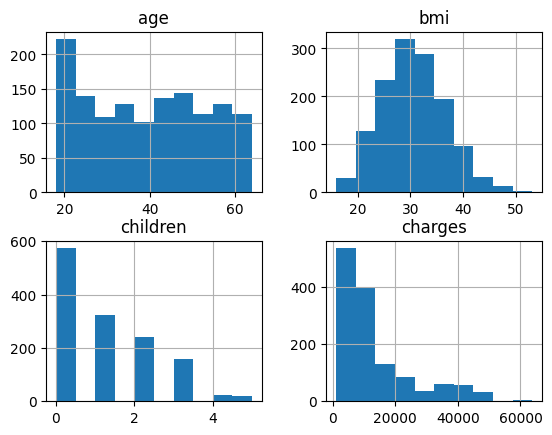

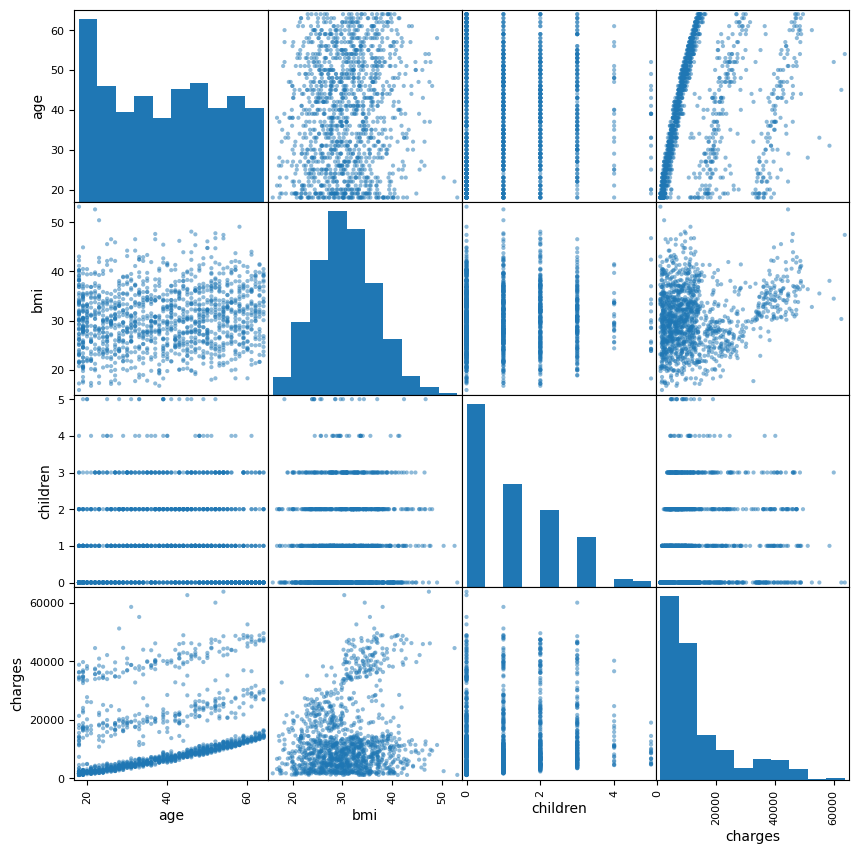

In [3]:
# Display summary statistics

print(df.describe())

# Plot histograms of the variables

df.hist()

# Plot a scatterplot matrix of the variables

pd.plotting.scatter_matrix(df, figsize=(10,10))

In [ ]:
# 대체로 변수들 간의 상관관계가 비선형적임. 이후 모델 선택에서 gradient boosting 계열 모델을 선택하는 것이 나을 것 같다고 생각.

In [4]:
# 흡연자인지 여부에 대한 이진 변수 생성

df['is_smoker'] = (df['smoker'] == 'yes').astype(int)
df

,age,sex,bmi,children,smoker,region,charges,is_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [5]:
# 흡연 여부에 따른 성별의 진료비 청구금액 평균 비교 -> 흡연 여부에 따라 같은 성별이라도 진료비청구금액이 큰 차이를 보인다.

df.groupby(['is_smoker', 'sex'])[['charges']].mean()

charges
is_smoker sex                 
0         female   8762.297300
          male     8087.204731
1         female  30678.996276
          male    33042.005975

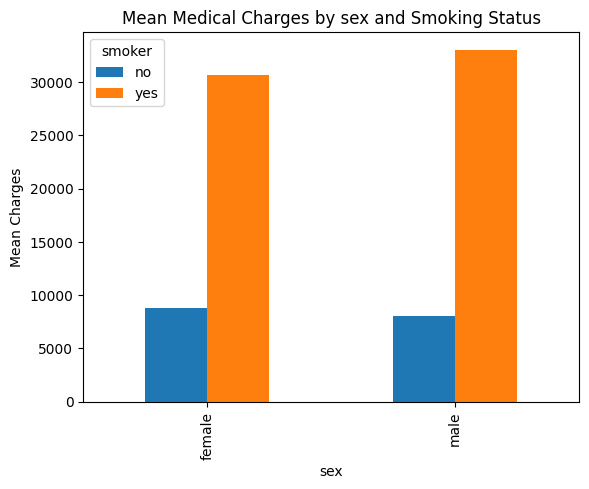

In [6]:
smoker_grouped = df.groupby(['sex', 'smoker'])
smoker_group_mean_charges = smoker_grouped['charges'].mean().unstack()
smoker_group_mean_charges.plot(kind='bar')
plt.xlabel('sex')
plt.ylabel('Mean Charges')
plt.title('Mean Medical Charges by sex and Smoking Status')
plt.show()

In [7]:
# 흡연 여부에 따른 연령대의 진료비 청구금액 평균 비교를 위해 연령대 그룹화

df['age_group'] = pd.cut(df['age'], bins=[0, 19, 29, 39, 49, 59, np.inf], labels=['10s', '20s', '30s', '40s', '50s', '60s+'])

In [8]:
# 연령 그룹별 진료비 청구금액 비교

df.groupby(['is_smoker', 'age_group'])[['charges']].mean()

charges
is_smoker age_group              
0         10s         3365.419567
          20s         4921.634844
          30s         6337.362945
          40s         9183.342097
          50s        12749.344280
          60s+       15232.709480
1         10s        26390.231749
          20s        28122.215715
          30s        30271.246415
          40s        32654.718697
          50s        37508.752875
          60s+       40630.695190

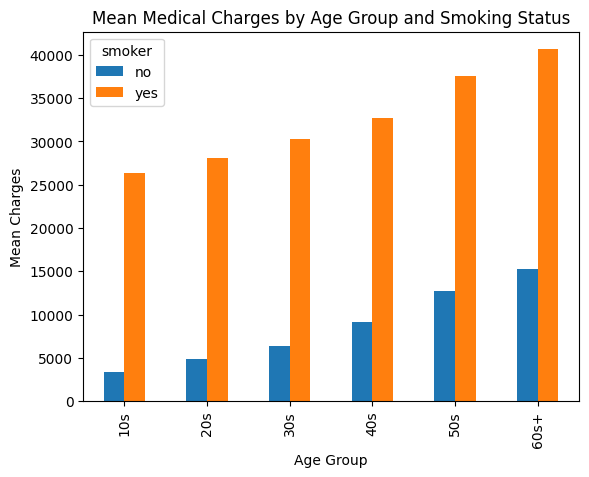

In [9]:
# 흡연 여부에 따른 연령대별 평균 의료비 그래프

smoker_grouped = df.groupby(['age_group', 'smoker'])
smoker_group_mean_charges = smoker_grouped['charges'].mean().unstack()
smoker_group_mean_charges.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Mean Charges')
plt.title('Mean Medical Charges by Age Group and Smoking Status')
plt.show()

In [10]:
# 흡연 여부에 따른 BMI별 의료비 청구금액의 평균을 구하기 위해 BMI그룹화

bins = [0, 18.5, 25, 30, 35, 40, np.inf]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Obese III']
df['bmi_group'] = pd.cut(df['bmi'], bins=bins, labels=labels)

In [11]:
# 흡연 여부에 따른 bmi_group별 의료비 청구 금액의 평균 비교

df.groupby(['is_smoker', 'bmi_group'])[['charges']].mean()

charges
is_smoker bmi_group                
0         Underweight   5485.056800
          Normal        7734.650116
          Overweight    8226.088675
          Obese I       8549.952377
          Obese II      9670.440600
          Obese III     8179.664367
1         Underweight  18809.824980
          Normal       19942.223641
          Overweight   22491.182935
          Obese I      39880.271809
          Obese II     42753.622873
          Obese III    45467.786146

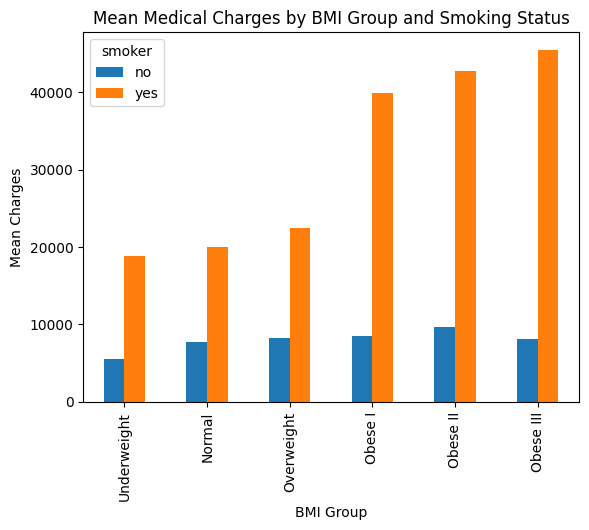

In [14]:
# 흡연 여부에 따른 bmi_group별 평균 의료비 그래프

smoker_grouped = df.groupby(['bmi_group', 'smoker'])
smoker_group_mean_charges = smoker_grouped['charges'].mean().unstack()
smoker_group_mean_charges.plot(kind='bar')
plt.xlabel('BMI Group')
plt.ylabel('Mean Charges')
plt.title('Mean Medical Charges by BMI Group and Smoking Status')
plt.show()

## 2. Resampling - Bootstrap Statistic

<AxesSubplot: xlabel='charges', ylabel='Count'>

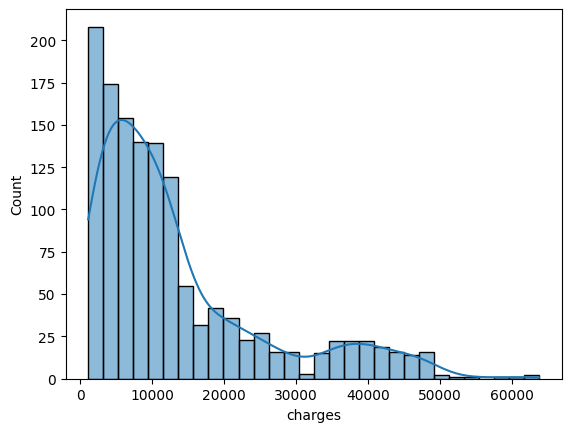

In [15]:
# 진료비 금액의 count barplot

sns.histplot(df.charges, kde=True)

In [16]:
# resampling

from sklearn.utils import resample

results_median = []
results_mean = []

In [17]:
# 중앙값을 resampling 하여 리스트에 append

for nrepeat in range(1000):
    sample = resample(df['charges'])
    results_median.append(sample.median())

In [18]:
# 평균값을 resampling 하여 리스트에 append

for nrepeat in range(1000):
    sample = resample(df['charges'])
    results_mean.append(sample.mean())

In [19]:
# 각각의 list를 Series 형태로 변환

results_median = pd.Series(results_median)
results_mean = pd.Series(results_mean)

<AxesSubplot: ylabel='Count'>

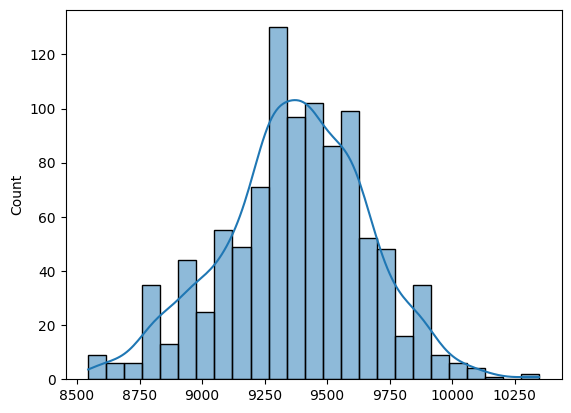

In [20]:
# resampling한 중앙값 데이터를 시각화

sns.histplot(results_median, kde=True)

<AxesSubplot: ylabel='Count'>

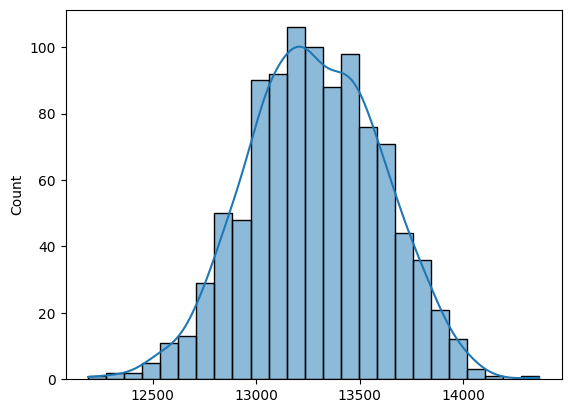

In [21]:
# resampling한 평균값 데이터를 시각화

sns.histplot(results_mean, kde=True)

## 3. Regression

### train/test split

In [22]:
X = df.drop(['charges', 'smoker'], axis=1)
y = df.charges

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

### one-hot encoding (변주형 변수-성별, 지역 인코딩)

In [23]:
# Encode categorical variables using one-hot encoding

X_train = pd.get_dummies(X_train, columns=['sex', 'region', 'bmi_group', 'age_group'])
X_test = pd.get_dummies(X_test, columns=['sex', 'region', 'bmi_group', 'age_group'])

### import algorithms

In [35]:
!pip install catboost

     --------------------------------------- 73.9/73.9 MB 27.3 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB ? eta 0:00:00


In [24]:
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import Pipeline

### import metrics

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### (1) Linear Regression Model

In [26]:
lin_reg = LinearRegression()

In [27]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [28]:
pred_lin_reg = lin_reg.predict(X_test)

### Test of Linear Regression

In [29]:
print("MSE", mean_squared_error(y_test, pred_lin_reg))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred_lin_reg)))
print("MAE:", mean_absolute_error(y_test, pred_lin_reg))
print("R2 Score:",r2_score(y_test, pred_lin_reg))

MSE 35032272.828274034
RMSE: 5918.8067064463285
MAE: 4310.5167572829305
R2 Score: 0.7609447262998312


### (2) Polynomial Regression

In [30]:
poly_reg = PolynomialFeatures(degree=3)

In [31]:
plr_model = Pipeline(steps=[('polyFeatures', poly_reg), ('regressor', lin_reg)])

In [32]:
plr_model.fit(X_train, y_train)

Pipeline(steps=[('polyFeatures', PolynomialFeatures(degree=3)),
                ('regressor', LinearRegression())])

In [33]:
pred_plr_model = plr_model.predict(X_test)

### Test of Polynomial Regression

In [34]:
print("MSE", mean_squared_error(y_test, pred_plr_model))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred_plr_model)))
print("MAE:", mean_absolute_error(y_test, pred_plr_model))
print("R2 Score:",r2_score(y_test, pred_plr_model))

MSE 2.0763092067747818e+22
RMSE: 144094038973.67795
MAE: 17662004365.214302
R2 Score: -141684402877544.25


### (3) Cat Boost

In [35]:
cat = CatBoostRegressor(learning_rate=0.01, silent=True)

In [36]:
cat.fit(X_test, y_test)

In [37]:
pred_cat = cat.predict(X_test)

In [38]:
print("MSE", mean_squared_error(y_test, pred_cat))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred_cat)))
print("MAE:", mean_absolute_error(y_test, pred_cat))
print("R2 Score:",r2_score(y_test, pred_cat))

MSE 8831322.432849718
RMSE: 2971.754100333626
MAE: 1617.6679568480972
R2 Score: 0.9397363051016366


### (4) Random Forest

In [39]:
rfr = RandomForestRegressor(max_depth=6, n_estimators=500)

In [40]:
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, n_estimators=500)

In [41]:
pred_rfr = rfr.predict(X_test)

In [42]:
print("MSE", mean_squared_error(y_test, pred_rfr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred_rfr)))
print("MAE:", mean_absolute_error(y_test, pred_rfr))
print("R2 Score:",r2_score(y_test, pred_rfr))

MSE 20575591.810759056
RMSE: 4536.032606888872
MAE: 2563.6889698421583
R2 Score: 0.8595950723501404


In [47]:
40*25

1000

In [44]:
558-560

-2

In [45]:
560-459

101

In [50]:
75*0.2

15.0